# Predicting House Price Using Python 

# About Data 

A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity.

In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [39]:
# importing csv file

df=pd.read_csv("Houses.csv")

In [40]:
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


In [41]:
df.shape

(545, 13)

In [42]:
df.dtypes

area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
price                int64
dtype: object

# Missing Data

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              545 non-null    int64 
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   stories           545 non-null    int64 
 4   mainroad          545 non-null    object
 5   guestroom         545 non-null    object
 6   basement          545 non-null    object
 7   hotwaterheating   545 non-null    object
 8   airconditioning   545 non-null    object
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    object
 11  furnishingstatus  545 non-null    object
 12  price             545 non-null    int64 
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [44]:
df.nunique()

area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
price               219
dtype: int64

In [45]:
df.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'price'],
      dtype='object')

In [46]:
# check for null values

pd.isnull(df).sum()

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64

In [47]:
df.describe()

,area,bedrooms,bathrooms,stories,parking,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


In [48]:
df.duplicated().any()

False

In [49]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [50]:
print_unique_col_values(df)

mainroad: ['yes' 'no']
guestroom: ['no' 'yes']
basement: ['no' 'yes']
hotwaterheating: ['no' 'yes']
airconditioning: ['yes' 'no']
prefarea: ['yes' 'no']
furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


# Exploratory Data Analysis 

# Histogram 

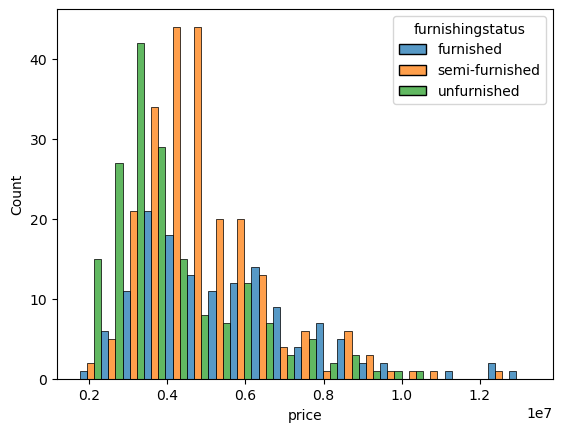

In [51]:
# plot histogram between furnishingstatus and price
sns.histplot(data=df, x='price', hue='furnishingstatus',multiple="dodge") 
plt.show()

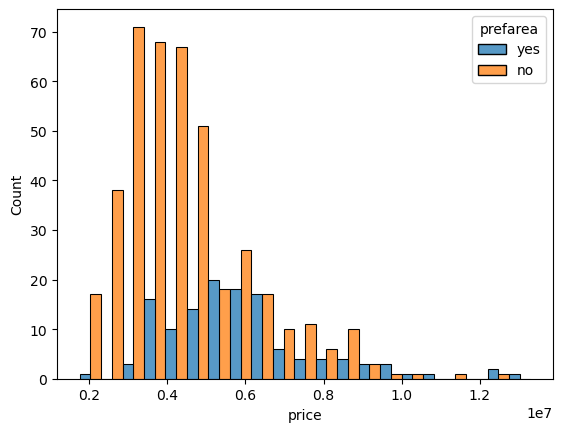

In [52]:
# plot histogram between furnishingstatus and price
sns.histplot(data=df, x='price', hue='prefarea',multiple="dodge") 
plt.show()

# Boxplot

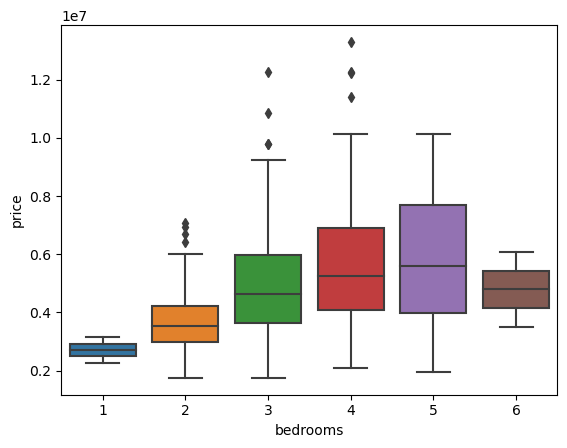

In [53]:
# plotting a boxplot for bedrooms vs price.
sns.boxplot(x='bedrooms' , y='price' ,data=df)
plt.show()

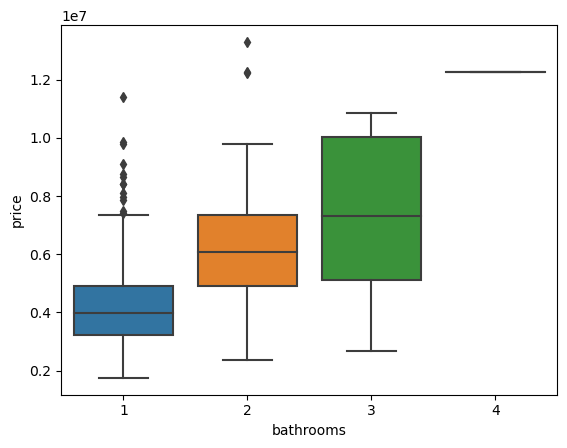

In [54]:
# plotting a boxplot for bathrooms vs price .
sns.boxplot(x='bathrooms' , y='price' ,data=df)
plt.show()

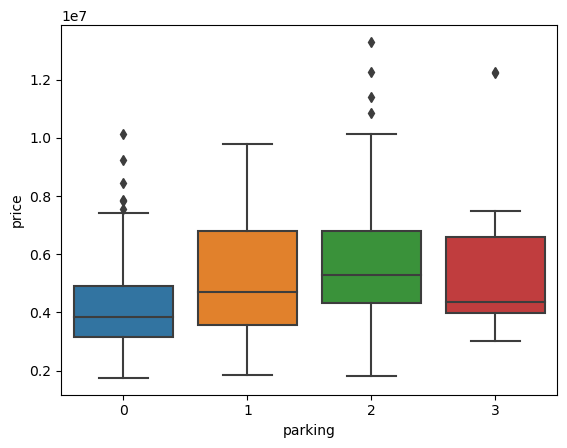

In [55]:
# plotting a boxplot for parking vs price.
sns.boxplot(x='parking' , y='price' ,data=df)
plt.show()

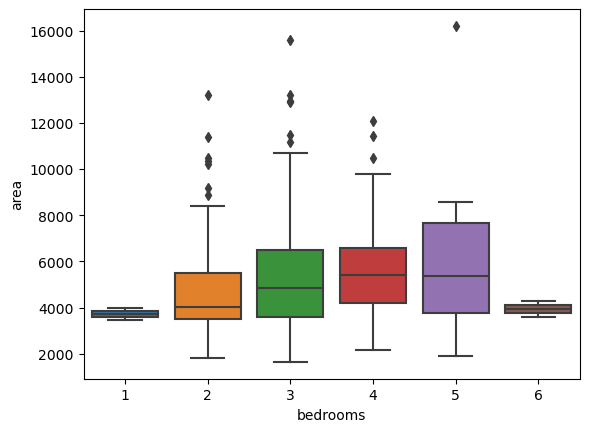

In [56]:
# plotting a boxplot for bedrooms vs area.
sns.boxplot(x='bedrooms' , y='area' ,data=df)
plt.show()

# Pairplot

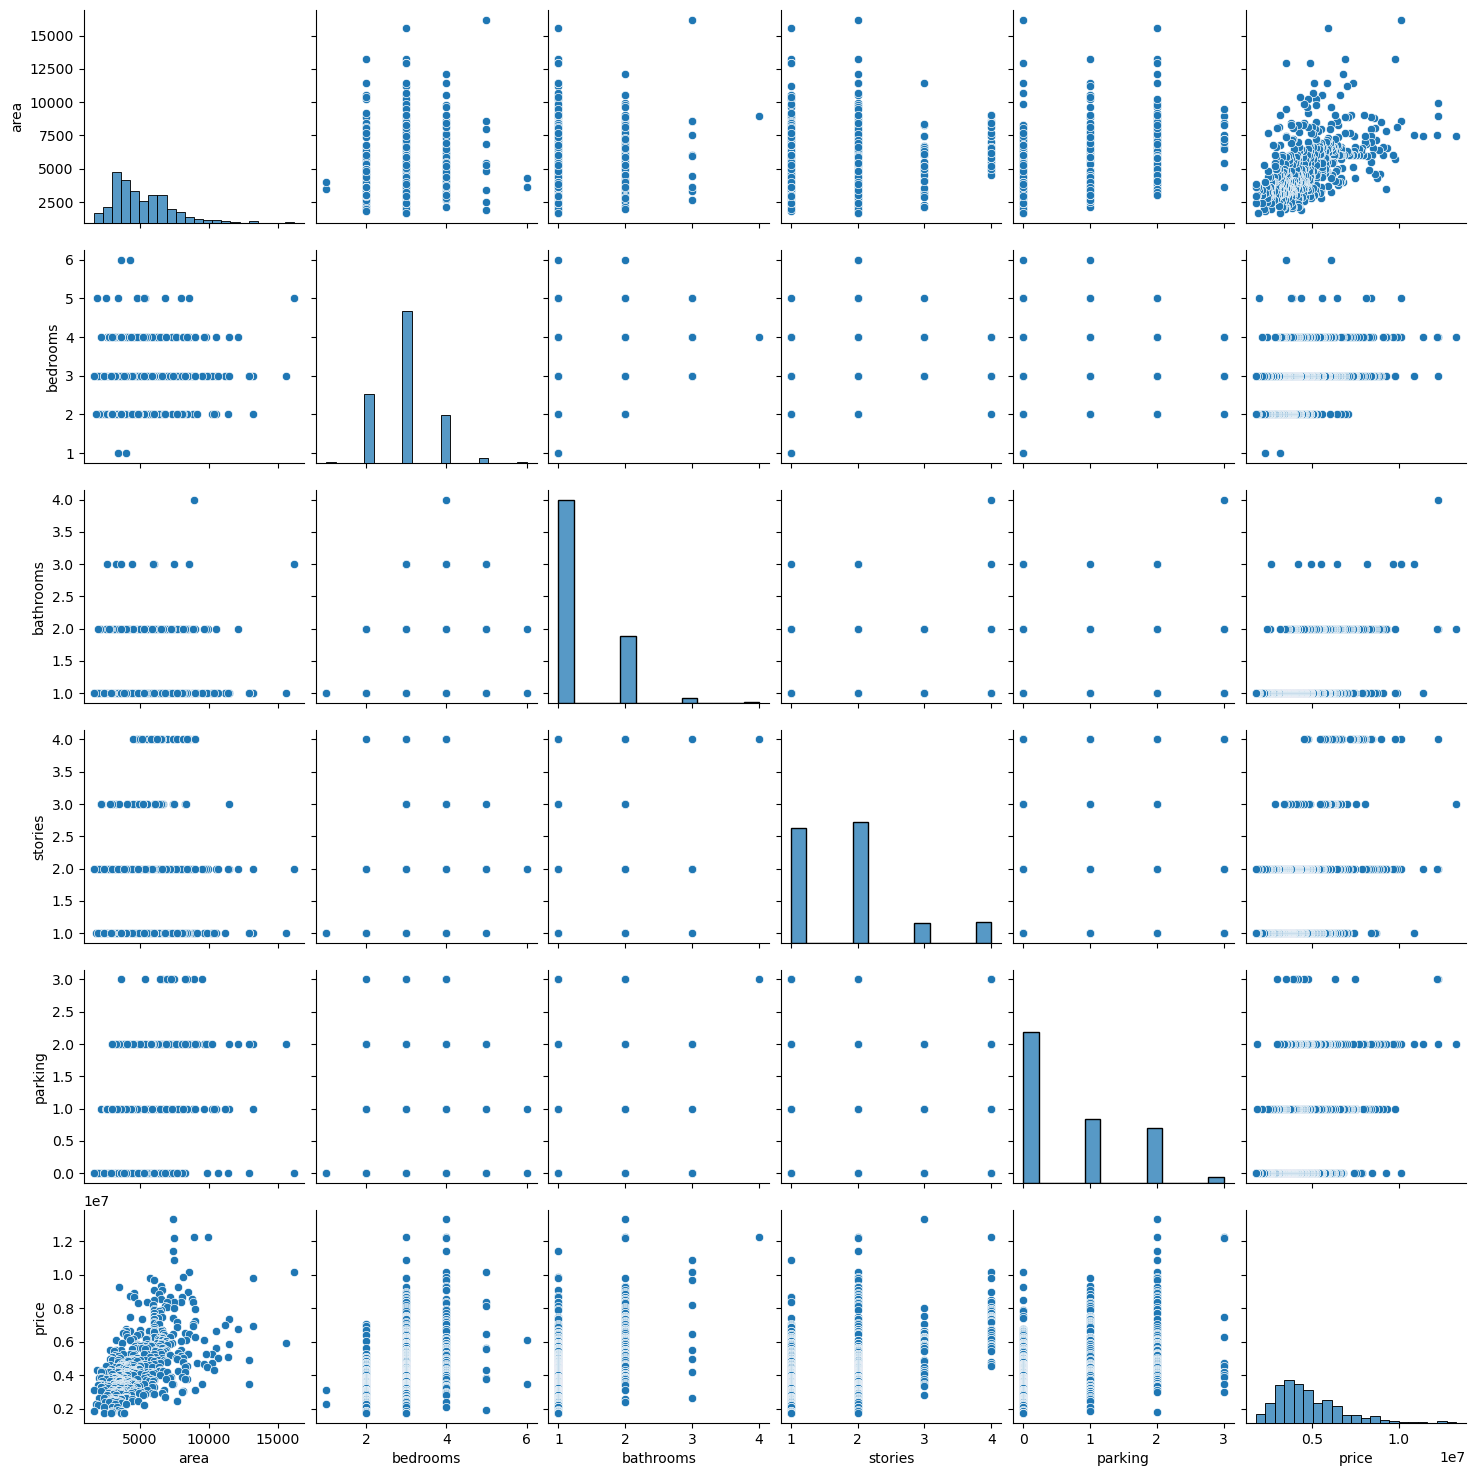

In [57]:
# plotting the pairplot
sns.pairplot(df)
plt.show()

# Train and Test Split Method

In [58]:
df.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'price'],
      dtype='object')

In [59]:
yes_no_columns = ['mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'prefarea',
       'furnishingstatus']
for col in yes_no_columns:
    df[col].replace({'yes': 1,'no': 0},inplace=True)

In [60]:
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,1,0,0,0,1,2,1,furnished,13300000
1,8960,4,4,4,1,0,0,0,1,3,0,furnished,12250000
2,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,12250000
3,7500,4,2,2,1,0,1,0,1,3,1,furnished,12215000
4,7420,4,1,2,1,1,1,0,1,2,0,furnished,11410000


In [61]:
from sklearn.preprocessing import LabelEncoder 
furnishingstatus=LabelEncoder()
df['furnishingstatus']=furnishingstatus.fit_transform(df['furnishingstatus'])

In [62]:
df.tail()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
540,3000,2,1,1,1,0,1,0,0,2,0,2,1820000
541,2400,3,1,1,0,0,0,0,0,0,0,1,1767150
542,3620,2,1,1,1,0,0,0,0,0,0,2,1750000
543,2910,3,1,1,0,0,0,0,0,0,0,0,1750000
544,3850,3,1,2,1,0,0,0,0,0,0,2,1750000


In [66]:
df.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'price'],
      dtype='object')

In [67]:
cols_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [68]:
df.tail()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
540,0.092784,0.2,0.0,0.000000,1,0,1,0,0,2,0,2,1820000
541,0.051546,0.4,0.0,0.000000,0,0,0,0,0,0,0,1,1767150
542,0.135395,0.2,0.0,0.000000,1,0,0,0,0,0,0,2,1750000
543,0.086598,0.4,0.0,0.000000,0,0,0,0,0,0,0,0,1750000
544,0.151203,0.4,0.0,0.333333,1,0,0,0,0,0,0,2,1750000


In [69]:
x=df.drop(["price"],axis="columns")
y=df['price']

In [70]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,2,1,0
1,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,3,0,0
2,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,2,1,1
3,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,3,1,0
4,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,2,0,0


In [71]:
# split the datasets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [72]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((436, 12), (109, 12), (436,), (109,))

In [73]:
x_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
248,0.168385,0.2,0.333333,0.000000,1,1,1,0,0,0,0,1
213,0.229897,0.6,0.333333,0.000000,1,0,1,0,0,0,0,1
265,0.084536,0.4,0.000000,0.333333,1,0,0,0,0,0,1,1
391,0.095258,0.4,0.000000,0.333333,1,0,1,0,0,0,0,1
36,0.400825,0.4,0.333333,0.666667,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
296,0.202749,0.4,0.333333,0.333333,1,0,0,0,1,1,0,1
278,0.120275,0.4,0.000000,0.333333,1,0,1,0,0,2,1,1
121,0.383574,0.4,0.000000,0.333333,1,1,1,0,1,0,1,1
218,0.217526,0.2,0.000000,0.000000,1,0,0,0,1,0,1,1


# Apply Grid Search CV 

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [75]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'Decision_Tree_Classifier':{
        'model':DecisionTreeClassifier(),
        'params' : {
            'criterion':['gini','entropy']
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
     
}

In [76]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,model,best_score,best_params
0,svm,0.040367,"{'C': 10, 'kernel': 'rbf'}"
1,random_forest,0.022018,{'n_estimators': 10}
2,logistic_regression,0.038532,{'C': 1}
3,Decision_Tree_Classifier,0.018349,{'criterion': 'gini'}
4,naive_bayes_gaussian,0.011009,{}


 SVM Giving The Best Score using {'C': 10, 'kernel': 'rbf'} params